# Decision Tree

##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
#plt.style.use(['seaborn-bright', 'dark_background'])

## Importing dataset

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data.describe()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,...,2.206700e+04,2.206700e+04,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000
mean,15115.161372,2547.069334,47.931345,0.391807,0.377487,0.772420,800.318575,2.211991,874.440975,66.934790,...,7.222013e+03,7.181977e+03,6694.966494,3.943065e+03,3.781366e+03,4.070565e+03,3.720333e+03,7.165418e+03,7.182148e+03,0.193683
std,8737.384035,1598.675520,16.393352,0.488165,1.044629,1.033849,431.454448,0.669556,904.244526,84.133427,...,2.105071e+04,1.927121e+04,17101.802052,8.661750e+04,3.254151e+04,5.726446e+04,2.517514e+04,1.959007e+04,2.097682e+04,0.395192
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7522.500000,1321.000000,36.000000,0.000000,0.000000,0.000000,409.000000,2.000000,159.000000,11.000000,...,1.906485e+03,2.209835e+03,1817.980000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.029970e+03,2.090665e+03,0.000000
50%,15120.000000,2202.000000,46.000000,0.000000,0.000000,0.000000,848.000000,2.000000,531.000000,28.000000,...,3.426740e+03,3.592880e+03,3380.690000,1.130000e+00,6.440000e+00,2.147300e+02,2.285000e+02,3.501740e+03,3.508160e+03,0.000000
75%,22685.500000,3370.000000,60.000000,1.000000,0.000000,2.000000,1096.000000,3.000000,1374.000000,90.000000,...,6.826095e+03,6.819235e+03,6628.750000,9.937800e+02,1.129115e+03,1.579220e+03,1.643175e+03,6.858385e+03,6.779355e+03,0.000000
max,30301.000000,11353.000000,90.000000,1.000000,52.000000,4.000000,1649.000000,3.000000,4782.000000,365.000000,...,1.001124e+06,1.192704e+06,856596.510000,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.074625e+06,1.326487e+06,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [5]:
#separating dependent and independent varibales
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

In [6]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [7]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

## Model Building, predictions

In [8]:
y_train

17588    0
6157     1
21427    0
17154    1
596      0
        ..
12363    0
3209     0
3961     0
4004     0
13238    0
Name: churn, Length: 17653, dtype: int64

In [9]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( class_weight = 'balanced')
classifier = DTC()

In [10]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [11]:
predicted_values[:30]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

##Evaluation Metrics

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [13]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3559
           1       0.45      0.48      0.46       855

    accuracy                           0.79      4414
   macro avg       0.66      0.67      0.67      4414
weighted avg       0.79      0.79      0.79      4414



# Visualising Decision Tree

In [14]:
!pip install graphviz

In [15]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree = classifier, out_file = 'tree_viz',
                max_depth=None, feature_names = X.columns ,
                label = None, impurity = False )

In [16]:
# from graphviz import render
# render(  filepath='tree_viz', format = 'png', engine = 'neato')

# Hyperparamter Tuning

In [17]:
classifier = DTC()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

## max_depth

In [18]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):

  model.fit(x1,y1)

  predict = model.predict(x1)
  f1 = f1_score(y1, predict)

  predict = model.predict(x2)
  f2 = f1_score(y2, predict)

  return f1, f2

In [19]:
def effect(train_score, test_score, x_axis, title):
  plt.figure(figsize = (5,5), dpi = 120)
  plt.plot(x_axis, train_score, color = 'red', label = 'train_Score')
  plt.plot(x_axis, test_score, color = 'blue', label = 'test_Score')
  plt.title(title)
  plt.legend()
  plt.xlabel("parameter_value")
  plt.ylabel("f1 score")
  plt.show()

In [30]:
maxdepth = [i for i in range(1,50)]
train = []
test = []

for i in maxdepth:  
  model = DTC(class_weight = 'balanced', max_depth = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

performance = pd.DataFrame({'max_depth':maxdepth,'Train_acc': train,'Test_acc':test})


In [31]:
performance.head()

,max_depth,Train_acc,Test_acc
0,1,0.494533,0.505010
1,2,0.487370,0.508861
2,3,0.521640,0.529009
3,4,0.515501,0.520797
4,5,0.561588,0.560411


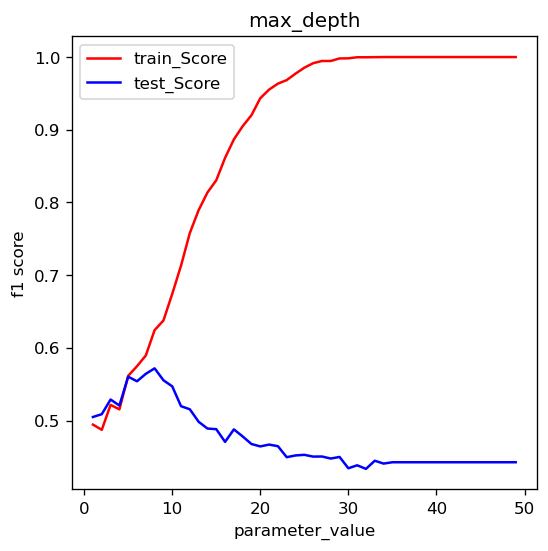

In [21]:
effect( train, test, range(1,50) , 'max_depth')

## min_samples_split

In [22]:
min_samples = [i for i in range(2,5000, 25)]
train = []
test = []

for i in min_samples:  
  model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

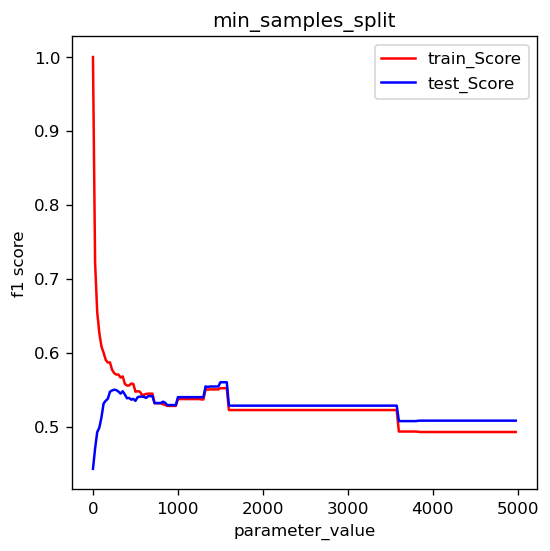

In [23]:
effect( train, test, range(2,5000, 25) , 'min_samples_split')

## max_leaf_nodes

In [24]:
maxleafnodes = [i for i in range(2,200,10)]
train = []
test = []

for i in maxleafnodes:  
  model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

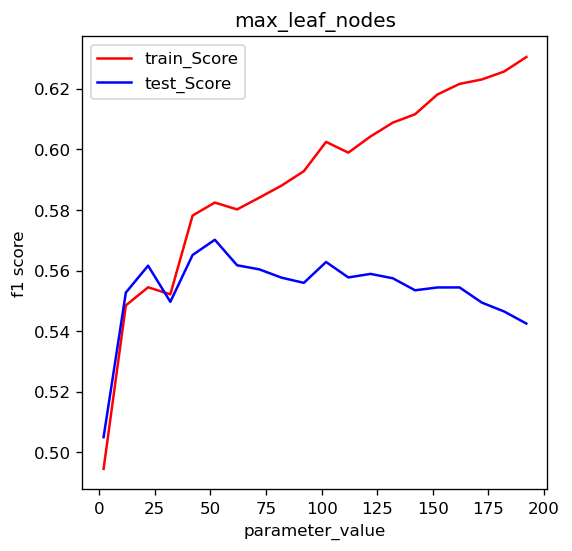

In [25]:
effect( train, test, range(2,200,10) , 'max_leaf_nodes')

## min_samples_leaf

In [26]:
minsamplesleaf = [i for i in range(2,4000,25)]
train = []
test = []

for i in minsamplesleaf:  
  model = DTC(class_weight = 'balanced', min_samples_leaf = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

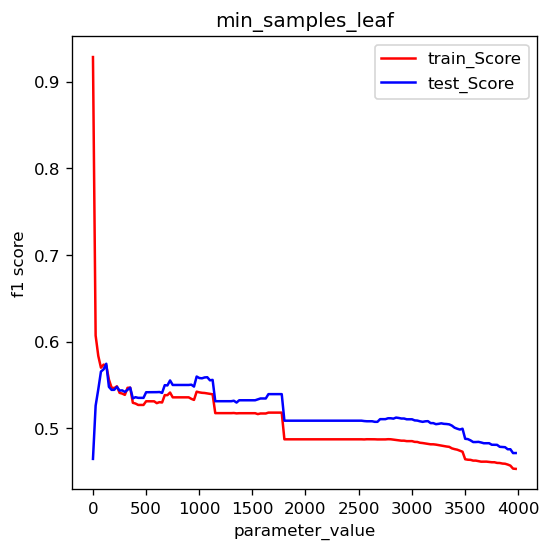

In [27]:
effect( train, test, range(2,4000,25) , 'min_samples_leaf')

In [28]:
model = DTC(max_depth = 9)
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
k = feature_imp.sort_values()

Text(0.5, 1.0, 'feature importance')

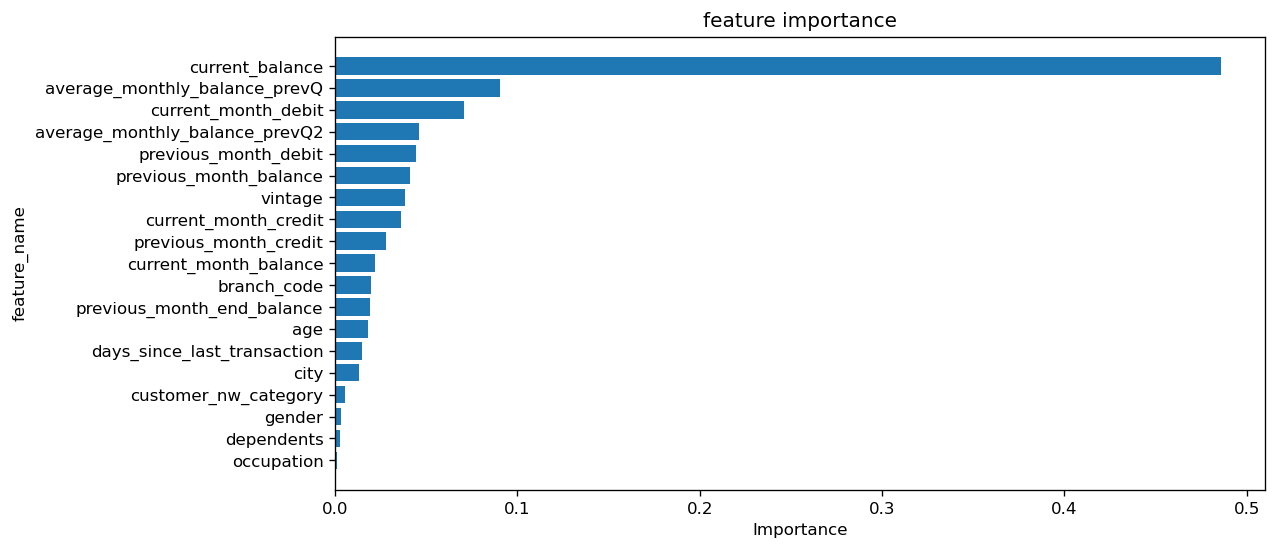

In [29]:
plt.figure(figsize = (10,5), dpi = 120)
plt.barh(k.index, k)
plt.xlabel('Importance')
plt.ylabel('feature_name')
plt.title('feature importance')